# Habitat suitability under climate change

[Our changing climate is changing where key grassland species can live,
and grassland management and restoration practices will need to take
this into
account.](https://www.frontiersin.org/articles/10.3389/fpls.2017.00730/full)

In this coding challenge, you will create a habitat suitability model
for a species of your choice that lives in the continental United States
(CONUS). We have this limitation because the downscaled climate data we
suggest, the [MACAv2 dataset](https://www.climatologylab.org/maca.html),
is only available in the CONUS – if you find other downscaled climate
data at an appropriate resolution you are welcome to choose a different
study area. If you don’t have anything in mind, you can take a look at
Sorghastrum nutans, a grass native to North America. [In the past 50
years, its range has moved
northward](https://www.gbif.org/species/2704414).

Your suitability assessment will be based on combining multiple data
layers related to soil, topography, and climate. You will also need to
create a **modular, reproducible, workflow** using functions and loops.
To do this effectively, we recommend planning your code out in advance
using a technique such as pseudocode outline or a flow diagram. We
recommend planning each of the blocks below out into multiple steps. It
is unnecessary to write a step for every line of code unles you find
that useful. As a rule of thumb, aim for steps that cover the major
structures of your code in 2-5 line chunks.

## STEP 1: STUDY OVERVIEW

Before you begin coding, you will need to design your study.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-respond"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Reflect and Respond</div></div><div class="callout-body-container callout-body"><p>What question do you hope to answer about potential future changes in
habitat suitability?</p></div></div>

How will potential climate changes in Northern and Southern Californian habitats affect suitability for the endemic blue oak?

### Species

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><p>Select the species you want to study, and research it’s habitat
parameters in scientific studies or other reliable sources. You will
want to look for reviews or overviews of the data, since an individual
study may not have the breadth needed for this purpose. In the US, the
National Resource Conservation Service can have helpful fact sheets
about different species. University Extension programs are also good
resources for summaries.</p>
<p>Based on your research, select soil, topographic, and climate
variables that you can use to determine if a particular location and
time period is a suitable habitat for your species.</p></div></div>

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-respond"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Reflect and Respond</div></div><div class="callout-body-container callout-body"><p>Write a description of your species. What habitat is it found in?
What is its geographic range? What, if any, are conservation threats to
the species? What data will shed the most light on habitat suitability
for this species?</p></div></div>

The blue oak (*Quercus douglasii*) is a deciduous drought-tolerant tree endemic to California. 
Blue oaks can be identified by their blue-green foliage, slightly to deeply lobed leaves, textured and pale gray bark, typical height between 20-60 ft., and natural settings of dry, rocky, and somewhat acidic to neutral soils. This species can be found among plant communities such as chaparral, foothill woodland, and oak woodland at elevations of 500-2000 ft. in the north and up to 5000 ft. in the south. The blue oak is dispersed throughout the state including in the central Sierra Nevada Eldorado National Forest and the central Coast and Transverse Ranges in Los Padres National Forest. Conservation threats facing the oak include escalation of pathogens and diminished regeneration. 

### Sites

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><p>Select at least two site to study, such as two of the U.S. National
Grasslands. You can download the <a
href="https://data.fs.usda.gov/geodata/edw/edw_resources/shp/S_USA.NationalGrassland.zip">USFS
National Grassland Units</a> and select your study sites. Generate a
site map for each location.</p>
<p>When selecting your sites, you might want to look for places that are
marginally habitable for this species, since those locations will be
most likely to show changes due to climate.</p></div></div>

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-respond"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Reflect and Respond</div></div><div class="callout-body-container callout-body"><p>Write a site description for each of your sites, or for all of your
sites as a group if you have chosen a large number of linked sites. What
differences or trends do you expect to see among your sites?</p></div></div>

Los Padres National Forest covers around 1.75 million acres in two distinct land divisions among the central California and Transverse Ranges in Southern California. In the North, Eldorado National Forest is embedded in the central Sierra Nevada comprising nearly 800,000 acres. Differences in hydrologic regimes, terrain, and temperature are observed across the sites.

### Time periods

In general when studying climate, we are interested in **climate
normals**, which are typically calculated from 30 years of data so that
they reflect the climate as a whole and not a single year which may be
anomalous. So if you are interested in the climate around 2050, download
at least data from 2035-2065.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-respond"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Reflect and Respond</div></div><div class="callout-body-container callout-body"><p>Select at least two 30-year time periods to compare, such as
historical and 30 years into the future. These time periods should help
you to answer your scientific question.</p></div></div>

Time periods: 
- Mid 21st Century (2035-2065)
- Late 21st century (2065-2095)

### Climate models

There is a great deal of uncertainty among the many global climate
models available. One way to work with the variety is by using an
**ensemble** of models to try to capture that uncertainty. This also
gives you an idea of the range of possible values you might expect! To
be most efficient with your time and computing resources, you can use a
subset of all the climate models available to you. However, for each
scenario, you should attempt to include models that are:

-   Warm and wet
-   Warm and dry
-   Cold and wet
-   Cold and dry

for each of your sites.

To figure out which climate models to use, you will need to access
summary data near your sites for each of the climate models. You can do
this using the [Climate Futures Toolbox Future Climate Scatter
tool](https://climatetoolbox.org/tool/Future-Climate-Scatter). There is
no need to write code to select your climate models, since this choice
is something that requires your judgement and only needs to be done
once.

If your question requires it, you can also choose to include multiple
climate variables, such as temperature and precipitation, and/or
multiple emissions scenarios, such as RCP4.5 and RCP8.5.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><p>Choose at least 4 climate models that cover the range of possible
future climate variability at your sites. How did you choose?</p></div></div>

Using the Future Climate Scenarios tool, I compared models under the RCP 4.5 emissions scenario (2050), looking at winter and summer mean temperatures (and change relative to historical by °F) as well as winter precipitation (and percent change relative to the historical value). 

- Warm and wet (CanESM2)
- Warm and dry (MIROC-ESM-CHEM)
- Cool and wet (CNRM-CM5)
- Cool and dry (GFDL-ESM2M)

University of California Merced (n.d.). *Future Climate Scenarios*. The Climate Toolbox. https://climatetoolbox.org/tool/Future-Climate-Scenarios

## Setup Analysis

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import os
import pathlib
import zipfile
from glob import glob
from math import floor, ceil
import tqdm as notebook_tqdm

import pandas as pd
import numpy as np
import geopandas as gpd
import rioxarray as rxr
from rioxarray.merge import merge_arrays
import xarray as xr
import xrspatial

import matplotlib.pyplot as plt
import hvplot.pandas
import hvplot.xarray
import cartopy.crs as ccrs
import geoviews as gv
import shapely

import earthaccess

/Users/laurenalexandra/miniconda3/envs/blue-oak/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Set Paths

In [4]:
# Images
images_dir = os.path.join(
    # Home directory
    pathlib.Path.home(),
    'Projects',
    # Project directory
    'habitat-suitability',
    'images'
)

# Datasets
datasets_dir = os.path.join(
    # Home directory
    pathlib.Path.home(),
    'Projects',
    # Project directory
    'habitat-suitability',
    'datasets'
)

# Project data directory 
data_dir = os.path.join(
    # Home directory
    pathlib.Path.home(),
    'Projects',
    # Project directory
    'habitat-suitability',
    'data'
)

# Define directories for data
land_units_dir = os.path.join(data_dir, 'usfs-national-lands')
eldorado_elevation_dir = os.path.join(data_dir, 'srtm', 'eldorado')
los_padres_elevation_dir = os.path.join(data_dir, 'srtm', 'los_padres')

os.makedirs(images_dir, exist_ok=True)
os.makedirs(datasets_dir, exist_ok=True)
os.makedirs(data_dir, exist_ok=True)
os.makedirs(eldorado_elevation_dir, exist_ok=True)
os.makedirs(los_padres_elevation_dir, exist_ok=True)

Load Utility Functions

In [3]:
def build_da(urls, bounds):
    """
    Build a DataArray from a list of urls.
    
    Args:
    urls (list): Input list of URLs.
    bounds (tuple): Site boundaries.

    Returns:
    xarray.DataArray: A merged DataArray.
    """
    
    all_das = []

    # Add buffer to bounds for plotting
    buffer = .025
    xmin, ymin, xmax, ymax = bounds
    bounds_buffer = (xmin-buffer, ymin-buffer, xmax+buffer, ymax+buffer)

    for url in urls:
        # Open data granule, mask missing data, scale data, 
        # and remove dimensions of length 1
        tile_da = rxr.open_rasterio(
                url,
                # For the fill/missing value
                mask_and_scale=True
            ).squeeze()
        # Unpack the bounds and crop tile
        cropped_da = tile_da.rio.clip_box(*bounds_buffer)
        all_das.append(cropped_da)

    merged = merge_arrays(all_das)
    return merged

In [4]:
def convert_longitude(longitude):
    """
    Convert longitude values from a range of 0 to 360 to -180 to 180.
    
    Args:
    longitude (float): Input longitude value.

    Returns:
    float: A value in the specified range.
    """
    
    return (longitude - 360) if longitude > 180 else longitude

In [5]:
def export_raster(da, raster_path):
    """
    Export raster DataArray to a raster file.
    
    Args:
    raster (xarray.DataArray): Input raster layer.
    raster_path (str): Output raster directory.

    Returns: None
    """
    
    output_file = os.path.join(data_dir, os.path.basename(raster_path))
    da.rio.to_raster(output_file)

In [6]:
def harmonize_raster_layers(reference_raster, input_rasters, output_dir):
    """
    Harmonize raster layers to ensure consistent spatial resolution 
    and projection.

    Args:
    reference_raster (xarray.DataArray): Input reference raster.
    input_rasters (list): List of site rasters.
    output_dir (str): Path of raster directory.

    Returns:
    list: A list of harmonized rasters.
    """
    harmonized_files = []

    harmonized_files.append(reference_raster)
    # Load the reference raster
    ref_raster = rxr.open_rasterio(reference_raster, masked=True)

    for raster_path in input_rasters:
        # Load the input raster
        input_raster = rxr.open_rasterio(raster_path, masked=True)

        # Reproject and align the input raster to match the reference raster
        harmonized_raster = input_raster.rio.reproject_match(ref_raster)

        # Save the harmonized raster to the output directory
        output_file = os.path.join(output_dir, os.path.basename(raster_path))
        harmonized_raster.rio.to_raster(output_file)
        harmonized_files.append(output_file)

    print('Harmonized rasters: ', len(harmonized_files))
    return harmonized_files

In [7]:
def plot_site(site_da, site_gdf, site_fig_name, plot_title, 
              bar_label, plot_cmap, boundary_clr, tif_file=False):
    """
    Create custom site plot.
    
    Args:
    site_da (xarray.DataArray): Input site raster.
    site_gdf (geopandas.GeoDataFrame): Input site GeoDataFrame.
    site_fig_name (str): Site figure name.
    plot_title (str): Plot title. 
    bar_label (str): Plot bar variable name.
    plot_cmap (str): Plot colormap name.
    boundary_clr (str): Plot site boundary color.
    tif_file (boolean): Indicates a site file.

    Returns:
    matplotlib.pyplot.plot: A plot of site values.
    """
    
    fig = plt.figure(figsize=(8, 6)) 
    ax = plt.axes()

    if tif_file:
        site_da = rxr.open_rasterio(site_da, masked=True)

    # Plot DataArray values
    site_plot = site_da.plot(
                            cmap=plot_cmap, 
                            cbar_kwargs={'label': bar_label}
                        )

    # Plot site boundary
    site_gdf.boundary.plot(ax=plt.gca(), color=boundary_clr)

    plt.title(f'{plot_title}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    fig.savefig(f"{images_dir}/{site_fig_name}.png") 

    return site_plot

Load Sites

In [5]:
# Only extract once
usfs_pattern = os.path.join(land_units_dir, '*.shp')

if not glob(usfs_pattern):
    usfs_zip = f'{datasets_dir}/S_USA.NFSLandUnit.zip'

    # Unzip data
    with zipfile.ZipFile(usfs_zip, 'r') as zip:
        zip.extractall(path=land_units_dir)

# Find the extracted .shp file path
usfs_land_path = glob(usfs_pattern)[0]

# Load USFS land units from shapefile
usfs_land_units_gdf = (
    gpd.read_file(usfs_land_path)
)

# Obtain units with location name
valid_units = usfs_land_units_gdf.dropna(subset=['HQ_LOCATIO'])

# Select only CA units
all_ca_units = valid_units[valid_units['HQ_LOCATIO'].str.contains('CA')]

In [6]:
earthaccess.login(strategy="interactive", persist=True)

In [7]:
# Search for Digital Elevation Models

ea_dem = earthaccess.search_datasets(keyword='SRTM DEM', count=15)
for dataset in ea_dem:
    print(dataset['umm']['ShortName'], dataset['umm']['EntryTitle'])

NASADEM_SHHP NASADEM SRTM-only Height and Height Precision Mosaic Global 1 arc second V001
NASADEM_SIM NASADEM SRTM Image Mosaic Global 1 arc second V001
NASADEM_SSP NASADEM SRTM Subswath Global 1 arc second V001
C_Pools_Fluxes_CONUS_1837 CMS: Terrestrial Carbon Stocks, Emissions, and Fluxes for Conterminous US, 2001-2016
SRTMGL1 NASA Shuttle Radar Topography Mission Global 1 arc second V003
GEDI01_B GEDI L1B Geolocated Waveform Data Global Footprint Level V002
GEDI02_B GEDI L2B Canopy Cover and Vertical Profile Metrics Data Global Footprint Level V002
NASADEM_HGT NASADEM Merged DEM Global 1 arc second V001
SRTMGL3 NASA Shuttle Radar Topography Mission Global 3 arc second V003
SRTMGL1_NC NASA Shuttle Radar Topography Mission Global 1 arc second NetCDF V003
SRTMGL30 NASA Shuttle Radar Topography Mission Global 30 arc second V002
SRTMIMGM NASA Shuttle Radar Topography Mission Combined Image Data Set V003
GFSAD30EUCEARUMECE Global Food Security-support Analysis Data (GFSAD) Cropland Exten

Plot Sites

In [8]:
# Los Padres National Forest
los_padres_gdf = all_ca_units.loc[
    all_ca_units['NFSLANDU_2'] == 'Los Padres National Forest'
]
los_padres_gdf

,NFSLANDUNI,NFSLANDU_1,NFFID,NFSLANDU_2,GIS_ACRES,EFFECTIVED,EXPIRATION,HQ_LOCATIO,COMMENTS,REGION,SHAPE_AREA,SHAPE_LEN,geometry
66,295387010328,National Forest,0058,Los Padres National Forest,1956740.523,0000/00/00,0000/00/00,"Goleta, CA",None,05,0.782005,12.961269,"MULTIPOLYGON (((-120.74838 35.44383, -120.7483..."


In [9]:
los_padres_gdf.geometry.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

<Axes: >

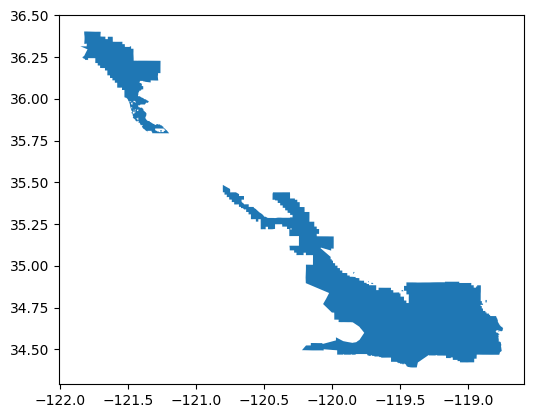

In [10]:
los_padres_gdf.plot()

In [11]:
# plot with EsriImagery basemap  
los_padres_gdf.hvplot(
    geo=True, tiles='EsriImagery',
    title='Los Padres National Forest',
    fill_color=None, line_color='lightblue', line_width=3,
    frame_width=600, frame_height=600
)

DataError: Supplied data does not contain specified dimensions, the following dimensions were not found: ['Longitude', 'Latitude']

PandasInterface expects tabular data, for more information on supported datatypes see https://holoviews.org/user_guide/Tabular_Datasets.html

<Axes: >

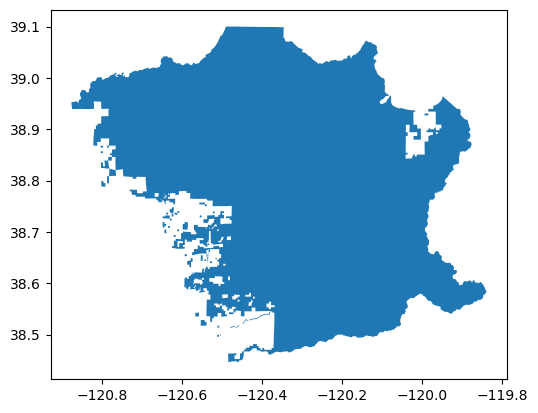

In [41]:
# Eldorado National Forest
eldorado_gdf = all_ca_units.loc[
    all_ca_units['NFSLANDU_2'] == 'Eldorado National Forest'
]

eldorado_gdf.plot()

## STEP 2: DATA ACCESS

### Soil data

The [POLARIS dataset](http://hydrology.cee.duke.edu/POLARIS/) is a
convenient way to uniformly access a variety of soil parameters such as
pH and percent clay in the US. It is available for a range of depths (in
cm) and split into 1x1 degree tiles.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><p>Write a <strong>function with a numpy-style docstring</strong> that
will download POLARIS data for a particular location, soil parameter,
and soil depth. Your function should account for the situation where
your site boundary crosses over multiple tiles, and merge the necessary
data together.</p>
<p>Then, use loops to download and organize the rasters you will need to
complete this section. Include soil parameters that will help you to
answer your scientific question. We recommend using a soil depth that
best corresponds with the rooting depth of your species.</p></div></div>

In [1]:
# Download soil data

### Topographic data

One way to access reliable elevation data is from the [SRTM
dataset](https://www.earthdata.nasa.gov/data/instruments/srtm),
available through the [earthaccess
API](https://earthaccess.readthedocs.io/en/latest/quick-start/).

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><p>Write a <strong>function with a numpy-style docstring</strong> that
will download SRTM elevation data for a particular location and
calculate any additional topographic variables you need such as slope or
aspect.</p>
<p>Then, use loops to download and organize the rasters you will need to
complete this section. Include topographic parameters that will help you
to answer your scientific question.</p></div></div>

> **Warning**
>
> Be careful when computing the slope from elevation that the units of
> elevation match the projection units (e.g. meters and meters, not
> meters and degrees). You will need to project the SRTM data to
> complete this calculation correctly.

In [2]:
# Download soil data

### Climate model data

You can use MACAv2 data for historical and future climate data. Be sure
to compare at least two 30-year time periods (e.g. historical vs. 10
years in the future) for at least four of the CMIP models. Overall, you
should be downloading at least 8 climate rasters for each of your sites,
for a total of 16. **You will *need* to use loops and/or functions to do
this cleanly!**.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><p>Write a <strong>function with a numpy-style docstring</strong> that
will download MACAv2 data for a particular climate model, emissions
scenario, spatial domain, and time frame. Then, use loops to download
and organize the 16+ rasters you will need to complete this section. The
<a
href="http://thredds.northwestknowledge.net:8080/thredds/reacch_climate_CMIP5_macav2_catalog2.html">MACAv2
dataset is accessible from their Thredds server</a>. Include an
arrangement of sites, models, emissions scenarios, and time periods that
will help you to answer your scientific question.</p></div></div>

In [4]:
# Download climate data

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-respond"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Reflect and Respond</div></div><div class="callout-body-container callout-body"><p>Make sure to include a description of the climate data and how you
selected your models. Include a citation of the MACAv2 data</p></div></div>

YOUR CLIMATE DATA DESCRIPTION AND CITATIONS HERE

## STEP 3: HARMONIZE DATA

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><p>Make sure that the grids for all your data match each other. Check
out the <a
href="https://corteva.github.io/rioxarray/stable/examples/reproject_match.html#Reproject-Match"><code>ds.rio.reproject_match()</code>
method</a> from <code>rioxarray</code>. Make sure to use the data source
that has the highest resolution as a template!</p></div></div>

> **Warning**
>
> If you are reprojecting data as you need to here, the order of
> operations is important! Recall that reprojecting will typically tilt
> your data, leaving narrow sections of the data at the edge blank.
> However, to reproject efficiently it is best for the raster to be as
> small as possible before performing the operation. We recommend the
> following process:
>
>     1. Crop the data, leaving a buffer around the final boundary
>     2. Reproject to match the template grid (this will also crop any leftovers off the image)

In [5]:
# Download soil data

## STEP 4: DEVELOP A FUZZY LOGIC MODEL

A fuzzy logic model is one that is built on expert knowledge rather than
training data. You may wish to use the
[`scikit-fuzzy`](https://pythonhosted.org/scikit-fuzzy/) library, which
includes many utilities for building this sort of model. In particular,
it contains a number of **membership functions** which can convert your
data into values from 0 to 1 using information such as, for example, the
maximum, minimum, and optimal values for soil pH.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><p>To train a fuzzy logic habitat suitability model:</p>
<pre><code>1. Research S. nutans, and find out what optimal values are for each variable you are using (e.g. soil pH, slope, and current climatological annual precipitation). 
2. For each **digital number** in each raster, assign a **continuous** value from 0 to 1 for how close that grid square is to the optimum range (1=optimal, 0=incompatible). 
3. Combine your layers by multiplying them together. This will give you a single suitability number for each square.
4. Optionally, you may apply a suitability threshold to make the most suitable areas pop on your map.</code></pre></div></div>

> **Tip**
>
> If you use mathematical operators on a raster in Python, it will
> automatically perform the operation for every number in the raster.
> This type of operation is known as a **vectorized** function. **DO NOT
> DO THIS WITH A LOOP!**. A vectorized function that operates on the
> whole array at once will be much easier and faster.

In [6]:
# Create fuzzy logic suitability model

## STEP 5: PRESENT YOUR RESULTS

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><p>Generate some plots that show your key findings. Don’t forget to
interpret your plots!</p></div></div>

In [7]:
# Create plots

YOUR PLOT INTERPRETATION HERE